In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uplooaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [42]:
df = pd.read_csv('NFLX.csv')
df.head(10)

,Date,Open,Close,High,Low,Adj Close,Volume
0,2/24/2020,364.760010,368.700012,372.820007,361.000000,368.700012,6936400
1,2/25/2020,372.000000,360.089996,375.649994,357.720001,360.089996,6481200
2,2/26/2020,366.309998,379.239990,382.000000,365.000000,379.239990,8934100
3,2/27/2020,371.459991,371.709991,391.559998,370.600006,371.709991,10967700
4,2/28/2020,364.209991,369.029999,376.769989,356.799988,369.029999,11178600
5,3/2/2020,373.109985,381.049988,381.359985,364.500000,381.049988,6997900
6,3/3/2020,381.029999,368.769989,393.519989,367.399994,368.769989,8364600
7,3/4/2020,377.769989,383.790009,384.010010,370.510010,383.790009,5487300
8,3/5/2020,381.000000,372.779999,391.399994,368.640015,372.779999,8747000
9,3/6/2020,367.700012,368.970001,371.309998,356.850006,368.970001,8147200


In [ ]:
df.shape

(252, 7)

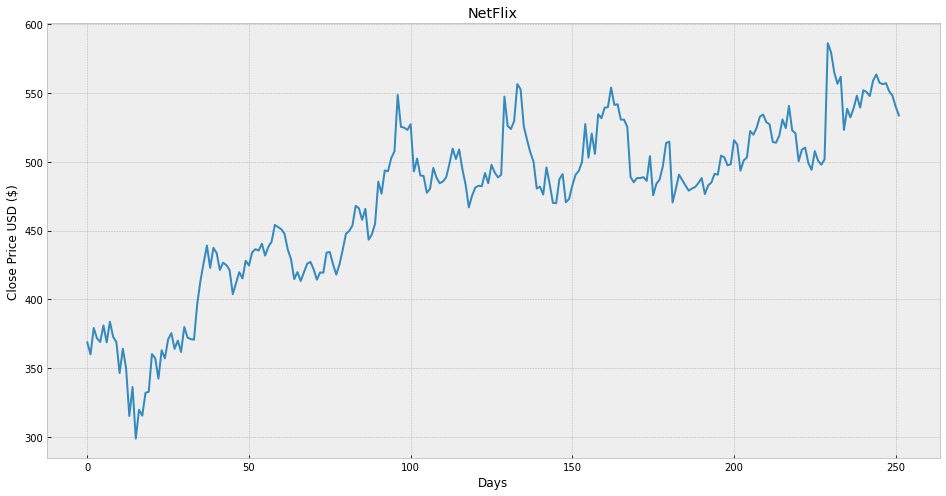

In [ ]:
plt.figure(figsize=(16,8))
plt.title('NetFlix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [30]:
df = df[['Close']]
df.head(4)

,Close
0,368.700012
1,360.089996
2,379.239990
3,371.709991


In [45]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Date,Open,Close,High,Low,Adj Close,Volume,Prediction
248,2/17/2021,550.98999,551.340027,555.250000,543.030029,551.340027,2069600,NaN
249,2/18/2021,549.00000,548.219971,550.000000,538.229980,548.219971,2456200,NaN
250,2/19/2021,548.00000,540.219971,548.989990,538.809998,540.219971,2838600,NaN
251,2/22/2021,534.98999,533.780029,541.789978,530.789978,533.780029,3076900,NaN


In [46]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[['2/24/2020' 364.76001 368.700012 ... 361.0 368.700012 6936400]
 ['2/25/2020' 372.0 360.089996 ... 357.72000099999997 360.089996 6481200]
 ['2/26/2020' 366.309998 379.23999 ... 365.0 379.23999 8934100]
 ...
 ['1/12/2021' 500.0 494.25 ... 485.670013 494.25 5990400]
 ['1/13/2021' 495.5 507.790009 ... 493.01000999999997 507.790009 5032100]
 ['1/14/2021' 507.35000599999995 500.85998499999994 ... 499.579987
  500.85998499999994 4177400]]


In [33]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[370.959991 375.5      364.079987 370.079987 361.76001  379.959991
 372.279999 371.119995 370.720001 396.720001 413.549988 426.75
 439.170013 422.959991 437.48999  433.829987 421.420013 426.700012
 424.98999  421.380005 403.829987 411.890015 419.850006 415.269989
 428.149994 424.679993 434.26001  436.529999 435.549988 440.519989
 431.820007 438.269989 441.950012 454.190002 452.579987 451.040009
 447.670013 436.25     429.320007 414.769989 419.890015 413.440002
 419.730011 425.920013 427.309998 421.970001 414.329987 419.600006
 419.48999  434.049988 434.480011 425.559998 418.070007 425.5
 436.130005 447.769989 449.869995 453.720001 468.040009 466.26001
 457.850006 465.910004 443.399994 447.23999  455.040009 485.640015
 476.890015 493.809998 493.160004 502.779999 507.76001  548.72998
 525.5      524.880005 523.26001  527.390015 492.98999  502.410004
 490.100006 489.820007 477.579987 480.450012 495.649994 488.51001
 484.480011 485.799988 488.880005 498.619995 509.640015 502.109985
 509.07

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [35]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train,y_train)


In [36]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[493.600006],
       [501.089996],
       [503.220001],
       [522.419983],
       [519.780029],
       [524.830017],
       [532.900024],
       [534.450012],
       [528.909973],
       [527.330017],
       [514.47998 ],
       [513.969971],
       [519.119995],
       [530.869995],
       [524.590027],
       [540.72998 ],
       [522.859985],
       [520.799988],
       [500.48999 ],
       [508.890015],
       [510.399994],
       [499.100006],
       [494.25    ],
       [507.790009],
       [500.859985]])

In [37]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[497.980011 501.769989 586.340027 579.840027 565.169983 482.880005
 561.929993 523.280029 538.599976 532.390015 539.039978 548.159973
 539.450012 552.159973 482.880005 547.919983 484.529999 563.590027
 557.590027 556.52002  482.029999 551.340027 548.219971 540.219971
 533.780029]

[504.35509374 508.83444992 510.10829021 521.59075655 520.01194346
 523.03206698 527.85829982 528.78526345 525.47206705 524.52718118
 516.84227204 516.53726336 519.61721297 526.64424974 522.88854199
 532.5409712  521.85389785 520.62192553 508.47561892 513.49921761
 514.40225403 507.64434499 504.74381985 512.84136377 508.69689284]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


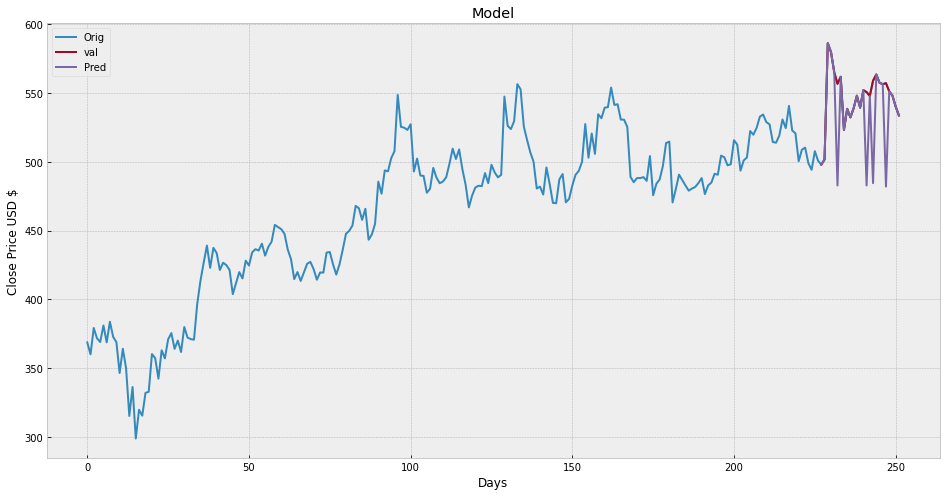

In [41]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD $')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig', 'val', 'Pred'])
plt.show()